<a href="https://colab.research.google.com/github/Johnny880724/AFSA_material/blob/main/Fishs_on_materials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient descent

In [1]:
import os
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

Current working directory: /Users/btsao/UT_Austin_doc/Fall_2024/PHY_381C/final_project/AFSA_material


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.cluster import DBSCAN

# Define the 2D Gaussian potential function
def gaussian_potential_np(X, Y, means, std_devs):
    Z = np.zeros_like(X)
    for i, mean in enumerate(means):
        Z -= np.exp(-0.5 * ((X - mean[0])**2 + (Y - mean[1])**2) / (std_devs[i]**2))
    return Z

# Define the optimization potential function
def potential_function(position):
    x, y = position
    return gaussian_potential_np(np.array([x]), np.array([y]), means, std_devs).item()

# Gradient descent optimization function
def gradient_descent_np(initial_points, learning_rate, tolerance, max_iterations):
    final_positions = []
    for point in initial_points:
        res = minimize(
            potential_function,
            point,
            method='L-BFGS-B',
            jac="2-point",
            tol=tolerance,
            options={'maxiter': max_iterations}
        )
        final_positions.append(res.x)
    return np.array(final_positions)

# Parameters for the Gaussian function
num_gaussians = 8
std_dev_range = (0.5, 2.0)
np.random.seed(42)  # For reproducibility
mean_x = np.random.uniform(-5, 5, num_gaussians)
mean_y = np.random.uniform(-5, 5, num_gaussians)
std_devs = np.random.uniform(*std_dev_range, num_gaussians)
means = np.column_stack((mean_x, mean_y))

# Grid for visualization
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = gaussian_potential_np(X, Y, means, std_devs)

# Gradient descent parameters
num_initial_points = 1000
initial_points = np.random.uniform(-10, 10, (num_initial_points, 2))
learning_rate = 0.1
max_iterations = 500
tolerance = 1e-5

# Perform gradient descent
final_positions = gradient_descent_np(initial_points, learning_rate, tolerance, max_iterations)

# Cluster the final positions to find local minima
clustering = DBSCAN(eps=0.1, min_samples=5).fit(final_positions)
unique_clusters = np.unique(clustering.labels_)
cluster_counts = {cluster: np.sum(clustering.labels_ == cluster) for cluster in unique_clusters}

# Identify cluster centers and values
local_minima = []
global_minimum = None
global_min_value = float('inf')
cluster_labels = {}

for i, cluster in enumerate(unique_clusters):
    if cluster != -1:  # Exclude noise points
        points_in_cluster = final_positions[clustering.labels_ == cluster]
        center = np.mean(points_in_cluster, axis=0)
        value = potential_function(center)
        cluster_labels[cluster] = {"center": center, "value": value}
        local_minima.append(center)
        if value < global_min_value:
            global_minimum = {"center": center, "value": value}
            global_min_value = value

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [8]:
## Mount Google Drive if running on Google Colab
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

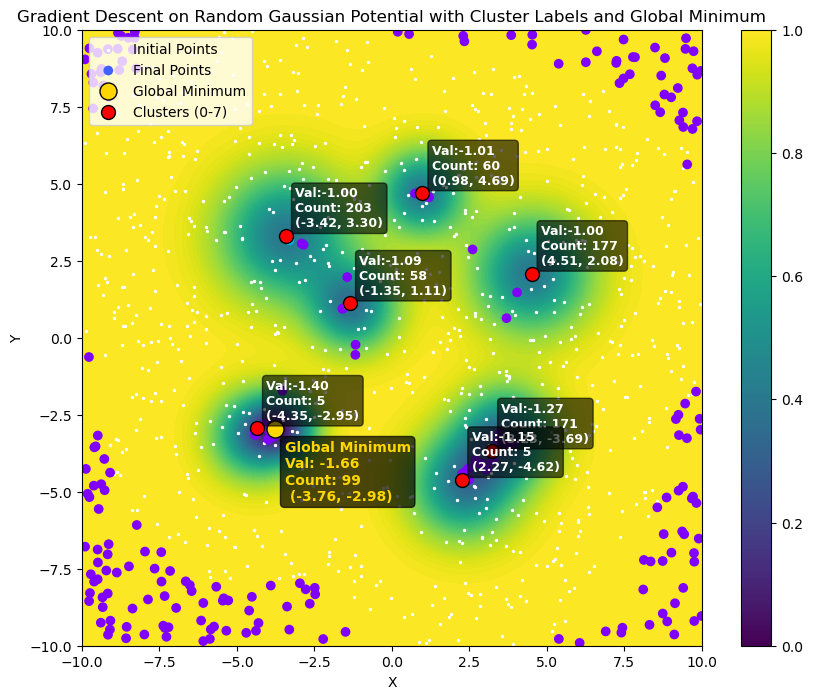

In [3]:
# Visualization with improved global minimum annotation
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, levels=100, cmap='viridis')
plt.scatter(initial_points[:, 0], initial_points[:, 1], c='white', s=2, label="Initial Points")
plt.scatter(final_positions[:, 0], final_positions[:, 1], c=clustering.labels_, cmap='rainbow', label="Final Points")

# Annotate cluster centers with counts (excluding the global minimum)
for cluster, data in cluster_labels.items():
    if np.array_equal(data["center"], global_minimum["center"]):
        continue  # Skip annotating the global minimum here
    center = data["center"]
    v = data["value"]
    count = cluster_counts[cluster]
    plt.scatter(*center, c='red', edgecolors='black', s=100)  # Do not add label here
    plt.text(
        center[0] + 0.3, center[1] + 0.3,
        f"Val:{v:.2f} \nCount: {count} \n({center[0]:.2f}, {center[1]:.2f})",
        color="white", fontsize=9, weight='bold', bbox=dict(facecolor='black', alpha=0.6, boxstyle='round'))

# Highlight global minimum with value, count, and position
global_pos = global_minimum["center"]
global_val = global_minimum["value"]
global_count = cluster_counts[np.argmin([data["value"] for data in cluster_labels.values()])]
plt.scatter(*global_pos, c='gold', edgecolors='black', s=150, label="Global Minimum")
plt.text(
    global_pos[0] + 0.3, global_pos[1] - 2.3,
    f"Global Minimum\nVal: {global_val:.2f}\nCount: {global_count}\n ({global_pos[0]:.2f}, {global_pos[1]:.2f})",
    color="gold", fontsize=10, weight='bold', bbox=dict(facecolor='black', alpha=0.7, boxstyle='round'))

# Add combined legend entry for clusters
plt.scatter([], [], c='red', edgecolors='black', s=100, label="Clusters (0-7)")

# Customize legend position and appearance
plt.colorbar()
plt.legend(loc='upper left')
plt.title("Gradient Descent on Random Gaussian Potential with Cluster Labels and Global Minimum")
plt.xlabel("X")
plt.ylabel("Y")

# save_path = '/content/drive/My Drive/crystal data/Gradient Descent.pdf'
save_path = cwd + '/images/Gradient Descent.png'
plt.savefig(save_path)
plt.show()

Generate random potential function

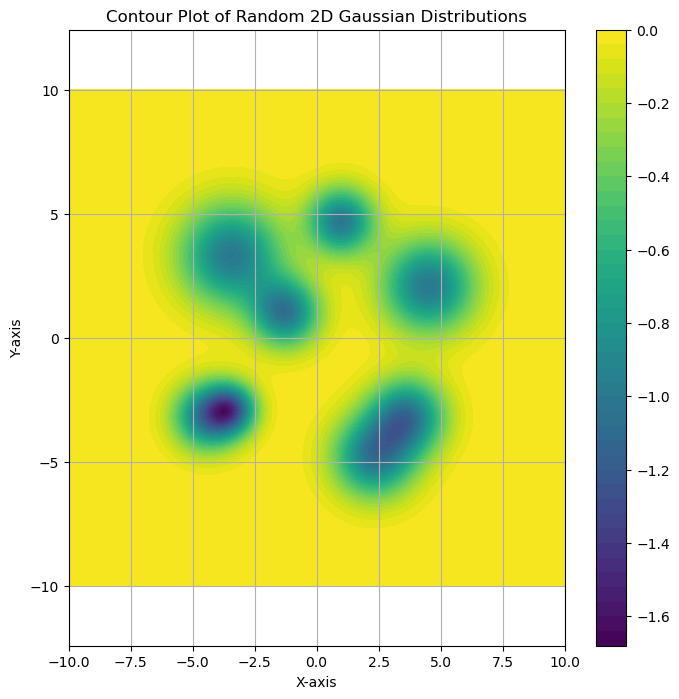

<Figure size 640x480 with 0 Axes>

In [4]:
# Parameter settings
# num_gaussians = 8  # Number of Gaussian functions to generate
# x = np.linspace(-10, 10, 400)
# y = np.linspace(-10, 10, 400)
# X, Y = np.meshgrid(x, y)
# Z = np.zeros_like(X)

# std_dev_range = (0.5, 2.0)  # Range of random standard deviations

# Randomly generate the mean positions and standard deviations of Gaussian potential wells
# mean_x = np.random.uniform(-5, 5, num_gaussians)  # Random mean x
# mean_y = np.random.uniform(-5, 5, num_gaussians)  # Random mean y
# std_devs = np.random.uniform(*std_dev_range, num_gaussians)  # Random standard deviations
# means = np.column_stack((mean_x, mean_y))  # Combine mean_x and mean_y into means

# Calculate the potential wells (negative Z values)
# for i, mean in enumerate(means):
#     Z -= np.exp(-0.5 * ((X - mean[0]) ** 2 + (Y - mean[1]) ** 2) / (std_devs[i] ** 2))

# Plot the contour map
plt.figure(figsize=(8, 8))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)  # Add color bar

# Add title and labels
plt.title('Contour Plot of Random 2D Gaussian Distributions')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.grid()
plt.show()
plt.savefig(cwd + '/images/Contour_Plot.png')


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Particle Swarm Optimization (PSO) parameters
num_particles = 30  # Number of particles
max_iterations = 30  # Maximum number of iterations
w = 0.5  # Inertia weight
c1 = 1.5  # Self-attraction coefficient
c2 = 1.5  # Group-attraction coefficient
boundary_min = -10  # Minimum boundary value
boundary_max = 10   # Maximum boundary value
max_velocity = 1.0  # Maximum velocity
penalty_factor = 100  # Penalty factor for particles out of bounds

# Initialize particle positions and velocities
particles = np.random.uniform(boundary_min, boundary_max, (num_particles, 2))
velocities = np.random.uniform(-0.5, 0.5, (num_particles, 2))  # Reduce initial velocity range

# Track the best positions of particles
p_best = particles.copy()
p_best_scores = np.full(num_particles, np.inf)
g_best = None
g_best_score = np.inf

# Define the objective function (to find the minimum value)
def objective_function(particle, means, std_devs):
    total_score = 0
    for i, mean in enumerate(means):
        distance = np.linalg.norm(particle - mean)
        score = np.exp(-0.5 * (distance / std_devs[i]) ** 2)
        total_score += score

    # If the particle is not within any potential well range, apply a penalty
    if total_score == 0:
        return penalty_factor
    return -total_score  # Invert score to ensure lower energy is higher score

# Prepare a matrix to store particle positions over iterations for animation
particles_over_time = []

# PSO main loop
for iteration in range(max_iterations):
    for i in range(num_particles):
        score = objective_function(particles[i], means, std_devs)

        # Update individual best positions
        if score < p_best_scores[i]:
            p_best_scores[i] = score
            p_best[i] = particles[i]

    # Update global best position
    g_best_index = np.argmin(p_best_scores)
    g_best = p_best[g_best_index]

    # Update particle velocities and positions
    r1, r2 = np.random.rand(2)
    velocities = (w * velocities +
                  c1 * r1 * (p_best - particles) +
                  c2 * r2 * (g_best - particles))

    # Limit maximum velocity
    velocities = np.clip(velocities, -max_velocity, max_velocity)

    particles += velocities

    # Correct particle positions to ensure they stay within boundaries and rebound if out of bounds
    out_of_bounds = (particles < boundary_min) | (particles > boundary_max)
    for j in range(num_particles):
        if out_of_bounds[j, 0]:
            particles[j, 0] = boundary_min if particles[j, 0] < boundary_min else boundary_max
            velocities[j, 0] *= -0.8  # Rebound and reduce speed
        if out_of_bounds[j, 1]:
            particles[j, 1] = boundary_min if particles[j, 1] < boundary_min else boundary_max
            velocities[j, 1] *= -0.8  # Rebound and reduce speed

    # Store the particles' positions for the current iteration
    particles_over_time.append(particles.copy())



Plot and animation

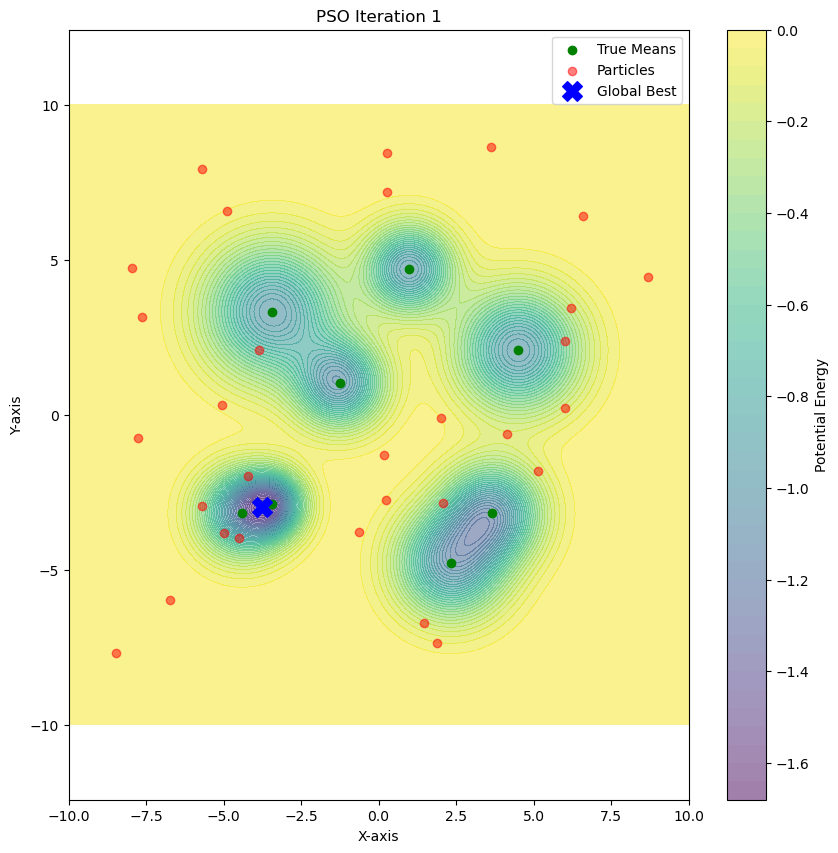

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

# Create the plot and animation
fig, ax = plt.subplots(figsize=(10, 10))

# Create the contour plot for potential wells (fixed background)
contour_set = ax.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.5)
plt.colorbar(contour_set, ax=ax, label='Potential Energy')

# Plot the true means (fixed, only once)
true_means_scatter = ax.scatter(means[:, 0], means[:, 1], color='green', marker='o', label='True Means')

# Initialize particles and global best on the plot (for the first frame)
particle_scatter = ax.scatter([], [], color='red', label='Particles', alpha=0.5)
global_best_scatter = ax.scatter([], [], color='blue', label='Global Best', marker='X', s=200)

ax.set_title(f'PSO Iteration 1')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.legend()
ax.axis('equal')

# Define the update function for the animation
def update(frame):
    # Update particle positions
    particle_scatter.set_offsets(particles_over_time[frame])

    # Update global best position
    if g_best is not None:
        global_best_scatter.set_offsets([g_best])

    # Update title with the current iteration number
    ax.set_title(f'PSO Iteration {frame + 1}')
    
    # Save the current frame as an image with the desired filename format
    filename = cwd+f'/animations/pso_animation_{frame:02d}.png'
    plt.savefig(filename)

# Create the animation using FuncAnimation
interval=300
ani = animation.FuncAnimation(fig, update, frames=max_iterations, interval=interval, repeat=False)

# Save the animation as an MP4 file
ani.save(cwd+'/animations/pso_animation.mp4', writer='ffmpeg', fps=10)

# Display the animation in the notebook
HTML(ani.to_jshtml())


Find most of local minimum

/var/folders/ph/4s7041md1qq0x741d9wy6glc0000gn/T/ipykernel_25793/3024148335.py:68: RuntimeWarning: invalid value encountered in divide
  velocities[j] += direction / distance * 5  # Stronger avoidance force
/var/folders/ph/4s7041md1qq0x741d9wy6glc0000gn/T/ipykernel_25793/3024148335.py:82: RuntimeWarning: invalid value encountered in divide
  velocities[j] += direction / np.linalg.norm(direction) * repulsion  # Push away from g_best


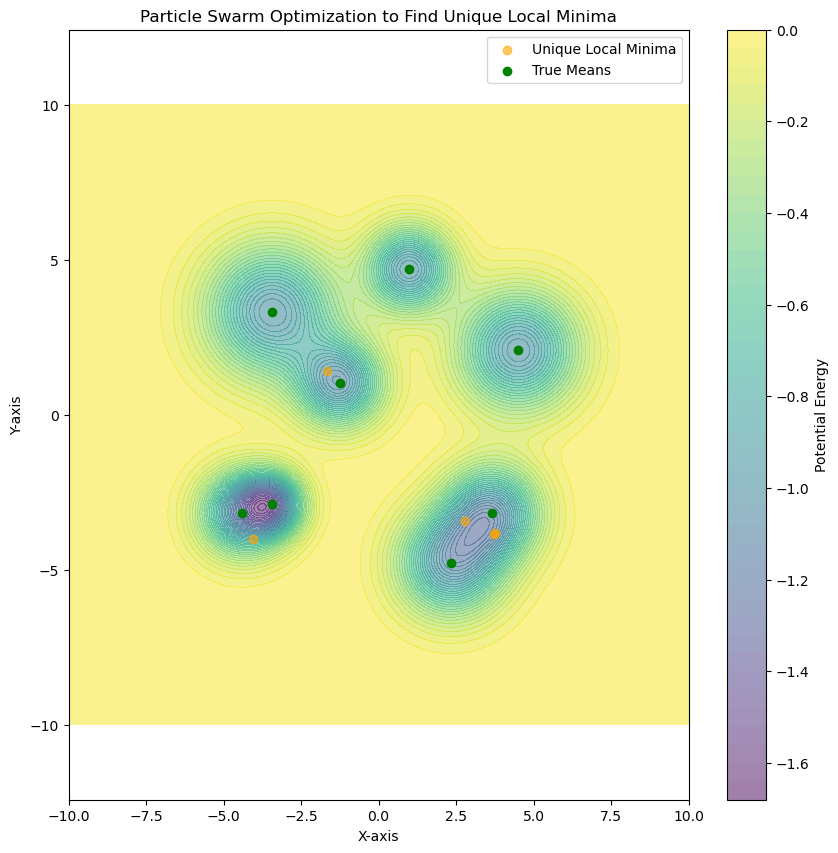

<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Particle swarm parameters
num_particles = 30  # Increase the number of fish
max_iterations = 50  # Increase number of iterations for better exploration
w = 0.3  # Decrease inertia weight
c1 = 0.2  # Decrease the influence of personal best position
c2 = 1.5  # Increase the attraction to the global best position
max_velocity = 2.0  # Maximum swimming speed of the fish
penalty_factor = 100  # Penalty for being in undesirable positions
repulsion = 5  # Repulsion of found minimums

# Initialize fish positions randomly within bounds to ensure good distribution
particles = np.random.uniform(-10, 10, (num_particles, 2))

# Initialize the swimming speed of the fish
velocities = np.random.uniform(-1, 1, (num_particles, 2))

# Track the best positions found by the fish
p_best = particles.copy()
p_best_scores = np.full(num_particles, np.inf)
local_minima = []

# Objective function that calculates the score based on the distance from potential wells
def objective_function(particle, means, std_devs):
    total_score = 0
    for i, mean in enumerate(means):
        distance = np.linalg.norm(particle - mean)  # Calculate distance to the well
        score = np.exp(-0.5 * (distance / std_devs[i]) ** 2)  # Score based on distance
        total_score += score

    if total_score == 0:
        return penalty_factor  # Fish should avoid this area
    return -total_score  # The goal is to minimize this score

# Repeat the search for local minima
for _ in range(6):  # Repeat 6 times to explore
    # PSO main loop where fish search for food (local minima)
    for iteration in range(max_iterations):
        for i in range(num_particles):
            score = objective_function(particles[i], means, std_devs)

            # Update the best position for each fish based on its score
            if score < p_best_scores[i]:
                p_best_scores[i] = score
                p_best[i] = particles[i]

        # Update the global best position based on all fish
        g_best_index = np.argmin(p_best_scores)
        g_best = p_best[g_best_index]

        # Record the current lowest point found by the school of fish
        local_minima.append(g_best)

        # Update the swimming speed and position of the fish
        r1, r2 = np.random.rand(2)
        velocities = (w * velocities +
                      c1 * r1 * (p_best - particles) +
                      c2 * r2 * (g_best - particles) * 0.1)  # Moderate attraction to g_best

        # Avoid already found lowest points (local minima)
        for j in range(num_particles):
            for min_point in local_minima:
                distance = np.linalg.norm(particles[j] - min_point)
                if distance < 4.0:  # If too close to a local minimum
                    direction = particles[j] - min_point  # Fish swims away from the well
                    velocities[j] += direction / distance * 5  # Stronger avoidance force

        # Ensure fish don't overlap; if they get too close, they swim apart
        for j in range(num_particles):
            for k in range(j + 1, num_particles):
                distance = np.linalg.norm(particles[j] - particles[k])
                if distance < 1.0:  # If two fish are too close
                    direction = particles[j] - particles[k]  # Swim away from each other
                    velocities[j] += direction / distance * 2

        # Introduce a repulsion from the global best position to encourage exploration
        if np.min(np.linalg.norm(particles - g_best, axis=1)) < 5.0:
            for j in range(num_particles):
                direction = particles[j] - g_best
                velocities[j] += direction / np.linalg.norm(direction) * repulsion  # Push away from g_best

        velocities = np.clip(velocities, -max_velocity, max_velocity)  # Limit swimming speed
        particles += velocities + np.random.uniform(-1, 1, particles.shape)  # Introduce random disturbances

    # Allow the fish to slightly explore other areas
    particles += np.random.uniform(-3, 3, particles.shape)  # Fish can wander a bit

# Remove duplicates from the found local minima
unique_minima = np.unique(local_minima, axis=0)

# Plotting the results
plt.figure(figsize=(10, 10))



plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.5)
plt.colorbar(label='Potential Energy')

# Plot the positions of the fish
#plt.scatter(particles[:, 0], particles[:, 1], color='red', label='Fish (Particles)', alpha=0.5)

# Plot unique local minima
if unique_minima.size > 0:
    plt.scatter(unique_minima[:, 0], unique_minima[:, 1], color='orange', label='Unique Local Minima', marker='o', alpha=0.6)

# Plot the true mean positions of the wells
means_plotted = False  # Flag to ensure only one entry for True Means in the legend
for mean in means:
    plt.scatter(mean[0], mean[1], color='green', marker='o', label='True Means' if not means_plotted else "")
    means_plotted = True

plt.title('Particle Swarm Optimization to Find Unique Local Minima')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.axis('equal')
plt.show()
plt.savefig(cwd + '/images/PSO_Local_Minima.png')
